# Neural Machine Translation: Model Comparison Across Topics

In this notebook, we'll explore how different Neural Machine Translation (NMT) models perform across various topics. We'll learn how to:
1. Load and prepare different types of translation data
2. Use the Hugging Face pipeline for translation
3. Evaluate translations using multiple metrics
4. Visualize and analyze model performance
5. Compare translations across different topics

Let's start by setting up our environment and loading the necessary libraries.

First, we need to install and import the required libraries. We'll use:
- `transformers` for the translation models
- `pandas` for data handling
- `matplotlib` and `seaborn` for visualization
- `sacrebleu` and `bert_score` for evaluation metrics

In [ ]:
# Install required packages if not already installed
!pip install transformers datasets evaluate sacrebleu
!pip install torch torchvision torchaudio
!pip install sentencepiece
!pip install sacremoses
!pip install bert_score
!pip install seaborn

In [60]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from bert_score import score
from sacrebleu import corpus_bleu
from tqdm import tqdm

# Set style for better visualizations
plt.style.use('default')  # Using default style instead of seaborn
sns.set_theme()  # This will apply seaborn's styling

## 1. Loading and Preparing Our Datasets

We'll be working with three different datasets, each focusing on a specific topic:
1. General translations (everyday conversations and situations)
2. Political translations (government, policies, elections)
3. Sports translations (matches, tournaments, athletes)

Let's first create a function to load our CSV files and then combine them into a single dataset.

In [61]:
# Function to load a dataset from a CSV file
def load_dataset(file_path):
    df = pd.read_csv(file_path,sep="\t")
    return df

# Load each dataset
print("Loading general translations...")
general_df = load_dataset('data/general_translations.csv')

print("Loading political translations...")
politics_df = load_dataset('data/political_translations.csv')

print("Loading sports translations...")
sports_df = load_dataset('data/sports_translations.csv')

# Add topic labels to each dataset
general_df['topic'] = 'general'
politics_df['topic'] = 'politics'
sports_df['topic'] = 'sports'

Loading general translations...
Loading political translations...
Loading sports translations...


## 2. Setting Up Our Translation Models

We'll compare three different translation models:
1. T5-small: A smaller, faster version of the T5 model
2. T5-base: The standard T5 model with better performance
3. Helsinki-NLP: A specialized model for English to French translation

Let's initialize these models using the Hugging Face pipeline. The pipeline makes it easy to use pre-trained models for various tasks.

In [63]:
# Initialize translation pipelines
print("Loading T5-small...")
t5_small = pipeline("translation_en_to_fr", model="t5-small")

print("Loading T5-base...")
t5_base = pipeline("translation_en_to_fr", model="t5-base")

print("Loading Helsinki-NLP model...")
helsinki = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")

# Store models in a dictionary for easier access
models = {
    'T5-small': t5_small,
    'T5-base': t5_base,
    'Helsinki-NLP': helsinki
}

# Test each model with a simple sentence
test_sentence = "Hello, how are you?"
print("\nTesting each model with a simple sentence:")
for model_name, model in models.items():
    # Add task prefix for T5 models
    if model_name.startswith('T5'):
        text = f"translate English to French: {test_sentence}"
    else:
        text = test_sentence
    
    result = model(text)[0]['translation_text']
    print(f"\n{model_name}:")
    print(f"Input: {test_sentence}")
    print(f"Output: {result}")

Loading T5-small...


Device set to use cpu


Loading T5-base...


Device set to use cpu


Loading Helsinki-NLP model...


Device set to use cpu



Testing each model with a simple sentence:

T5-small:
Input: Hello, how are you?
Output: Bonjour, comment êtes-vous ?

T5-base:
Input: Hello, how are you?
Output: Bonjour, comment êtes-vous?

Helsinki-NLP:
Input: Hello, how are you?
Output: Bonjour, comment allez-vous ?


## 3. Translating Our Datasets

Let's translate our datasets step by step. We'll:
1. First translate a small subset to test our setup
2. Then translate the full dataset for each topic
3. Store the translations for evaluation

In [64]:
# Section 1: General Topic Translations
print("=== Section 1: General Topic Translations ===")
print("This section will be completed individually.")

# Function to translate a single text with a model
def translate_text(text, model, model_name):
    """Translate a single text using the specified model."""
    return model(text)[0]['translation_text']

# Function to translate a dataframe's source_text column
def translate_dataframe(df, model, model_name, batch_size=10):
    """Translate all texts in a dataframe's source_text column."""
    translations = []
    total_rows = len(df)
    
    print(f"\nTranslating {total_rows} texts with {model_name}...")
    
    # Process in batches to show progress
    for i in range(0, total_rows, batch_size):
        batch = df.iloc[i:i+batch_size]
        for _, row in batch.iterrows():
            translation = translate_text(row['source_text'], model, model_name)
            translations.append(translation)
        
        # Show progress
        progress = min(i + batch_size, total_rows)
        print(f"Progress: {progress}/{total_rows} texts translated")
    
    return translations

# Translate general dataset with each model
print("\nTranslating general dataset...")
general_translations = {}

for model_name, model in models.items():
    print(f"\nTranslating with {model_name}...")
    translations = translate_dataframe(general_df, model, model_name)
    general_translations[model_name] = translations
    general_df[f'translation_{model_name.lower().replace("-", "_")}'] = translations

# Display examples from general dataset
print("\n=== Example Translations from General Dataset ===")
example = general_df.iloc[0]
print(f"Source: {example['source_text']}")
print(f"Reference: {example['target_text']}")
for model_name in models.keys():
    column_name = f'translation_{model_name.lower().replace("-", "_")}'
    print(f"{model_name}: {example[column_name]}")

print("\nSection 1 complete! General dataset has been translated and stored in general_df.")

=== Section 1: General Topic Translations ===
This section will be completed individually.

Translating general dataset...

Translating with T5-small...

Translating 50 texts with T5-small...
Progress: 10/50 texts translated
Progress: 20/50 texts translated
Progress: 30/50 texts translated
Progress: 40/50 texts translated
Progress: 50/50 texts translated

Translating with T5-base...

Translating 50 texts with T5-base...
Progress: 10/50 texts translated
Progress: 20/50 texts translated
Progress: 30/50 texts translated
Progress: 40/50 texts translated
Progress: 50/50 texts translated

Translating with Helsinki-NLP...

Translating 50 texts with Helsinki-NLP...
Progress: 10/50 texts translated
Progress: 20/50 texts translated
Progress: 30/50 texts translated
Progress: 40/50 texts translated
Progress: 50/50 texts translated

=== Example Translations from General Dataset ===
Source: Hello, how are you?
Reference: Bonjour, comment allez-vous?
T5-small: Bonjour, comment êtes-vous ?
T5-base: Bo

In [49]:
# Exercise 1a: Add the translations to the politics dataframe
# Exercise 1b: Add the translations to the sports dataframe


Translating general dataset...

Translating with T5-small...

Translating 50 texts with T5-small...
Progress: 10/50 texts translated
Progress: 20/50 texts translated
Progress: 30/50 texts translated
Progress: 40/50 texts translated
Progress: 50/50 texts translated

Translating with T5-base...

Translating 50 texts with T5-base...
Progress: 10/50 texts translated
Progress: 20/50 texts translated
Progress: 30/50 texts translated
Progress: 40/50 texts translated
Progress: 50/50 texts translated

Translating with Helsinki-NLP...

Translating 50 texts with Helsinki-NLP...
Progress: 10/50 texts translated
Progress: 20/50 texts translated
Progress: 30/50 texts translated
Progress: 40/50 texts translated
Progress: 50/50 texts translated

Section 2 complete! Politiucs dataset has been translated and stored in general_df.


## 4. Evaluating with BLEU Score

Now that we have our translations, let's evaluate them using the BLEU score. We'll:
1. Calculate BLEU scores for our test subset
2. Calculate BLEU scores for the full dataset
3. Compare scores across models and topics

In [66]:
# Function to calculate BLEU score for a set of translations
def calculate_bleu_score(translations, references):
    """Calculate BLEU score for a set of translations against their references."""
    return corpus_bleu(translations, [references]).score

# Section 1: General Topic BLEU Scores
print("=== Section 1: General Topic BLEU Scores ===")
print("In this section, we'll calculate BLEU scores for general translations.")
print("This will serve as an example for the group work sections that follow.")

# Calculate BLEU scores for general translations
general_bleu_scores = {}
for model_name in models.keys():
    column_name = f'translation_{model_name.lower().replace("-", "_")}'
    bleu_score = calculate_bleu_score(
        general_df[column_name].tolist(),
        general_df['target_text'].tolist()
    )
    general_bleu_scores[model_name] = bleu_score
    print(f"{model_name} BLEU Score: {bleu_score:.2f}")


=== Section 1: General Topic BLEU Scores ===
In this section, we'll calculate BLEU scores for general translations.
This will serve as an example for the group work sections that follow.
T5-small BLEU Score: 63.06
T5-base BLEU Score: 70.87
Helsinki-NLP BLEU Score: 82.84


In [ ]:
# Exercise 2a: Add Bleu scores for the politics
# Exercise 2b: Add bleu scroes for the sports

T5-small BLEU Score: 66.31
T5-base BLEU Score: 74.58
Helsinki-NLP BLEU Score: 71.77


## 5. Evaluating with BERTScore

Now let's evaluate our translations using BERTScore, which provides a different perspective on translation quality. We'll:
1. Calculate BERTScore for our test subset
2. Calculate BERTScore for the full dataset
3. Compare scores across models and topics

In [67]:
# Function to calculate BERTScore for a set of translations
def calculate_bertscore(translations, references):
    """Calculate BERTScore for a set of translations against their references."""
    P, R, F1 = score(translations, references, lang='fr', verbose=False)
    return F1.mean().item()

# Section 2: General Topic BERTScore
print("=== Section 2: General Topic BERTScore ===")
print("In this section, we'll calculate BERTScore for general translations.")
print("This will serve as an example for the group work sections that follow.")

# Calculate BERTScore for general translations
general_bertscores = {}
for model_name in models.keys():
    column_name = f'translation_{model_name.lower().replace("-", "_")}'
    bertscore = calculate_bertscore(
        general_df[column_name].tolist(),
        general_df['target_text'].tolist()
    )
    general_bertscores[model_name] = bertscore
    print(f"{model_name} BERTScore: {bertscore:.4f}")

=== Section 2: General Topic BERTScore ===
In this section, we'll calculate BERTScore for general translations.
This will serve as an example for the group work sections that follow.
T5-small BERTScore: 0.9502
T5-base BERTScore: 0.9630
Helsinki-NLP BERTScore: 0.9736


In [ ]:
# Exercise 3a: Add BERTScores for the politics
# Exercise 3b: Add BERTScroes for the sports

## 6. Visualizing the Results

Let's create visualizations to better understand how the models perform across different topics. We'll create:
1. Bar plots comparing BLEU scores
2. Bar plots comparing BERTScore
3. A heatmap showing overall performance

=== Section 3: Visualizing Results for General Dataset ===
Let's create visualizations to compare model performance using both metrics.
Note: BERTScore has been multiplied by 100 for easier comparison with BLEU scores.


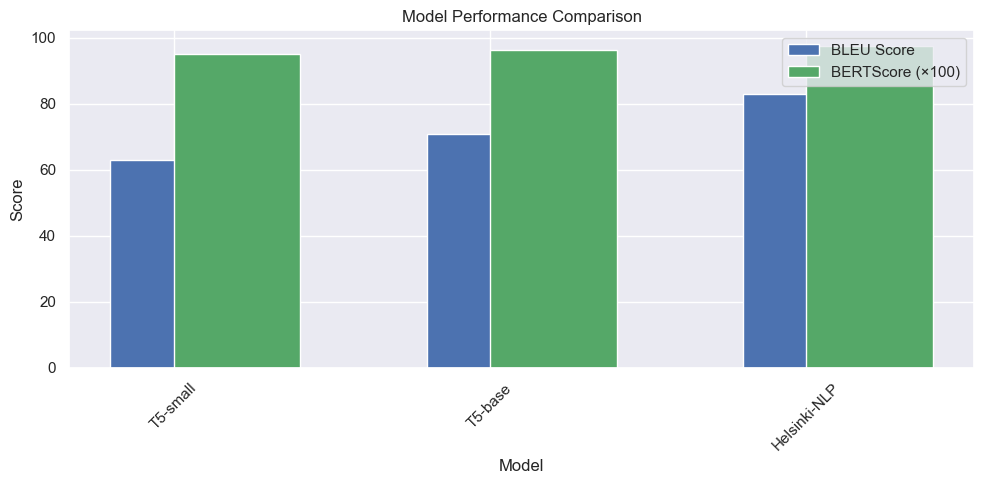


Numerical Comparison:

BLEU Scores:
T5-small: 63.06
T5-base: 70.87
Helsinki-NLP: 82.84

BERTScore (original values):
T5-small: 0.9502
T5-base: 0.9630
Helsinki-NLP: 0.9736

BERTScore (×100 for comparison):
T5-small: 95.02
T5-base: 96.30
Helsinki-NLP: 97.36


In [68]:
# Section 3: Visualizing Results for General Dataset
print("=== Section 3: Visualizing Results for General Dataset ===")
print("Let's create visualizations to compare model performance using both metrics.")
print("Note: BERTScore has been multiplied by 100 for easier comparison with BLEU scores.")

# Create a figure for combined bar plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot BLEU Scores
ax.bar(general_bleu_scores.keys(), general_bleu_scores.values(), width=0.4, label='BLEU Score', align='center', color='b')

# Plot BERTScore with an offset (multiplied by 100)
bert_scores_scaled = {model: score * 100 for model, score in general_bertscores.items()}
ax.bar(bert_scores_scaled.keys(), bert_scores_scaled.values(), width=0.4, label='BERTScore (×100)', align='edge', color='g')

# Set titles and labels
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.tick_params(axis='x', rotation=45)

# Add legend
ax.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print numerical comparison
print("\nNumerical Comparison:")
print("\nBLEU Scores:")
for model, score in general_bleu_scores.items():
    print(f"{model}: {score:.2f}")

print("\nBERTScore (original values):")
for model, score in general_bertscores.items():
    print(f"{model}: {score:.4f}")

print("\nBERTScore (×100 for comparison):")
for model, score in bert_scores_scaled.items():
    print(f"{model}: {score:.2f}")

## 7. Group Exercises

### Find a model to translate your dataset.
### Use Bleu and BERTScore to evaluate the results.
### Visualize the results.
### Try with 1 or 2 more models.